In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("fraud_dataset.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transaction_type,channel,transaction_time,time_since_last_transaction,is_new_device,amount_fraction_of_balance,is_new_destination,LoginAttempts
0,217,PAYMENT,3170.28,C1000001337,58089.00,54918.72,M216466820,0.00,0.00,0,0,Payment,web,2025-01-10 01:00:00,0.0,1,0.054576,1,1
1,19,PAYMENT,3849.38,C1000009135,103120.55,99271.17,M2120765976,0.00,0.00,0,0,Payment,web,2025-01-01 19:00:00,0.0,0,0.037329,1,1
2,302,PAYMENT,17686.93,C100001401,104117.89,86430.95,M70139133,0.00,0.00,0,0,Payment,web,2025-01-13 14:00:00,0.0,0,0.169874,1,1
3,163,CASH_OUT,77027.49,C1000015836,19787.00,0.00,C941241676,0.00,77027.49,0,0,Withdrawal,mobile_app,2025-01-07 19:00:00,0.0,0,1.000000,1,1
4,96,CASH_OUT,290045.17,C1000018217,0.00,0.00,C187378283,914750.06,1204795.23,0,0,Withdrawal,mobile_app,2025-01-05 00:00:00,0.0,0,0.000000,1,1


In [5]:
df["is_new_device"].value_counts()

0    950000
1     50000
Name: is_new_device, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   step                         1000000 non-null  int64  
 1   type                         1000000 non-null  object 
 2   amount                       1000000 non-null  float64
 3   nameOrig                     1000000 non-null  object 
 4   oldbalanceOrg                1000000 non-null  float64
 5   newbalanceOrig               1000000 non-null  float64
 6   nameDest                     1000000 non-null  object 
 7   oldbalanceDest               1000000 non-null  float64
 8   newbalanceDest               1000000 non-null  float64
 9   isFraud                      1000000 non-null  int64  
 10  isFlaggedFraud               1000000 non-null  int64  
 11  transaction_type             1000000 non-null  object 
 12  channel                      1000000 non-nu

In [7]:
df["transaction_type"].value_counts()

Withdrawal    351432
Payment       338453
Deposit       219961
Transfer       83696
Debit           6458
Name: transaction_type, dtype: int64

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'transaction_type', 'channel', 'transaction_time',
       'time_since_last_transaction', 'is_new_device',
       'amount_fraction_of_balance', 'is_new_destination', 'LoginAttempts'],
      dtype='object')

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,time_since_last_transaction,is_new_device,amount_fraction_of_balance,is_new_destination,LoginAttempts
count,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,243.512303,1.804999e+05,8.319644e+05,8.534179e+05,1.105606e+06,1.230483e+06,0.001266,0.000003,0.036100,0.050000,0.385261,1.0,1.121309
std,142.415978,6.170112e+05,2.884868e+06,2.921068e+06,3.417108e+06,3.698862e+06,0.035558,0.001732,2.985462,0.217945,0.448322,0.0,0.385413
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
25%,156.000000,1.336029e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
50%,239.000000,7.487864e+04,1.425613e+04,0.000000e+00,1.329588e+05,2.153516e+05,0.000000,0.000000,0.000000,0.000000,0.076919,1.0,1.000000
75%,335.000000,2.092836e+05,1.071842e+05,1.443272e+05,9.482025e+05,1.115964e+06,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000
max,742.000000,6.933732e+07,4.039905e+07,3.795009e+07,3.553805e+08,3.560159e+08,1.000000,1.000000,626.000000,1.000000,1.000000,1.0,5.000000


In [10]:
df.isnull().sum()

step                           0
type                           0
amount                         0
nameOrig                       0
oldbalanceOrg                  0
newbalanceOrig                 0
nameDest                       0
oldbalanceDest                 0
newbalanceDest                 0
isFraud                        0
isFlaggedFraud                 0
transaction_type               0
channel                        0
transaction_time               0
time_since_last_transaction    0
is_new_device                  0
amount_fraction_of_balance     0
is_new_destination             0
LoginAttempts                  0
dtype: int64

In [11]:
df.shape

(1000000, 19)

In [12]:
# check duplicates
df[df.duplicated()].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transaction_type,channel,transaction_time,time_since_last_transaction,is_new_device,amount_fraction_of_balance,is_new_destination,LoginAttempts


## Exploratory Data Analysis (EDA)

In [13]:
# Checking for proportion of Fraud transactions
df["isFraud"].value_counts()

0    998734
1      1266
Name: isFraud, dtype: int64

In [14]:
#Percentage of Frauds
df["isFraud"].value_counts()[1] / df.shape[0] * 100

0.1266

(array([0, 1]), [Text(0, 0, 'non_fraud'), Text(1, 0, 'fraud')])

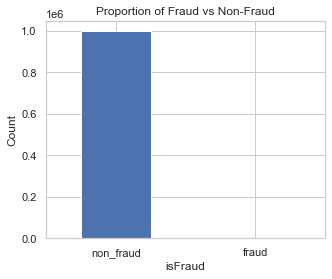

In [15]:
fraud_counts = df["isFraud"].value_counts().rename({0: "non_fraud", 1: "fraud"})
plt.figure(figsize=(5,4))
fraud_counts.reindex(["non_fraud", "fraud"]).plot(kind="bar")
plt.title("Proportion of Fraud vs Non-Fraud")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.xticks(rotation=0)

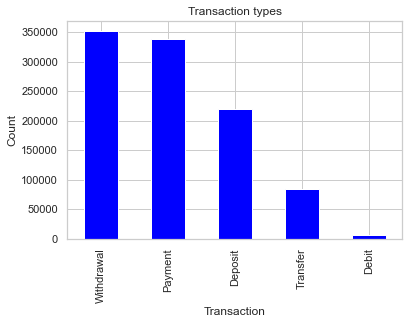

In [16]:
# Visualzation transaction types
df["transaction_type"].value_counts().plot(kind ="bar", title="Transaction types", color="blue")
plt.xlabel("Transaction")
plt.ylabel("Count")
plt.show()

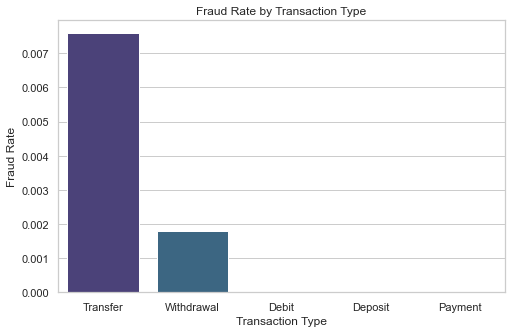

In [17]:
# Fraud rate by transaction type
fraud_per_type = df.groupby("transaction_type")["isFraud"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_per_type.index, y=fraud_per_type.values, palette="viridis")
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Type")
plt.title("Fraud Rate by Transaction Type")
plt.show()


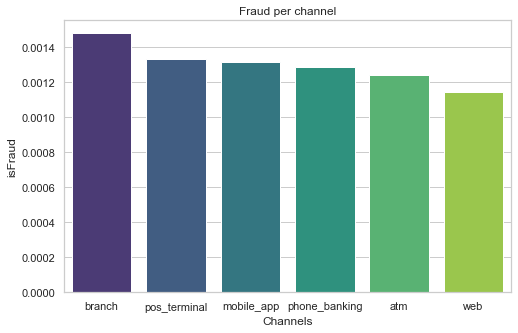

In [18]:
# Fraud rate by Channel
fraud_per_channel = df.groupby("channel")["isFraud"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_per_channel.index, y=fraud_per_channel.values, palette = "viridis")
plt.title("Fraud per channel")
plt.xlabel("Channels")
plt.ylabel("isFraud")
plt.show()

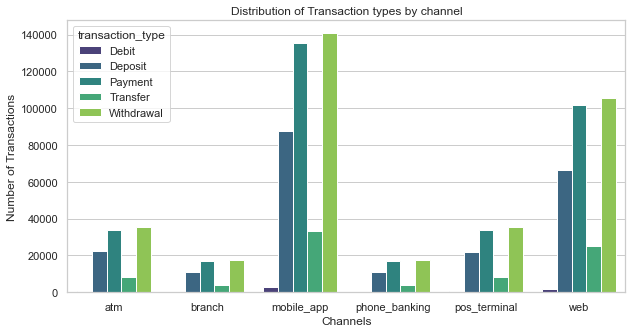

In [19]:
# Distribution of transaction_type by Channel
fraud_analysis = df.groupby(["channel","transaction_type"])["nameOrig"].count().reset_index()
fraud_analysis.columns = ["channel", "transaction_type", "count"]
plt.figure(figsize=(10,5))
sns.barplot(data=fraud_analysis, x="channel", hue="transaction_type", y= "count", palette="viridis")
plt.title("Distribution of Transaction types by channel")
plt.xlabel("Channels")
plt.ylabel("Number of Transactions")
plt.show()

In [20]:
fraudrate_crosstab = pd.crosstab(index=df["transaction_type"],columns=df["channel"], values=df["isFraud"], aggfunc="mean",
    )

fraudrate_crosstab

channel,atm,branch,mobile_app,phone_banking,pos_terminal,web
transaction_type,,,,,,
Debit,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Deposit,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Payment,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Transfer,0.007493,0.007855,0.00811,0.008393,0.007639,0.006726
Withdrawal,0.001783,0.002346,0.00182,0.001678,0.001928,0.001651


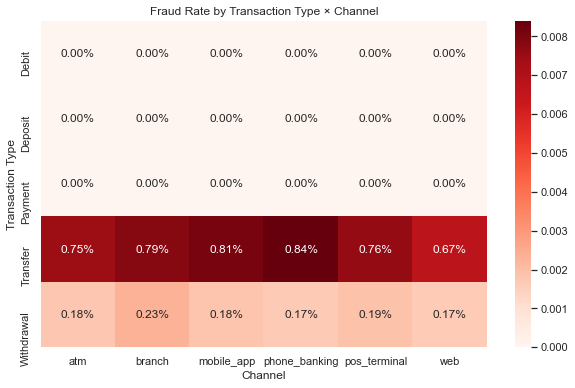

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(fraudrate_crosstab, annot=True, fmt=".2%", cmap="Reds")
plt.title("Fraud Rate by Transaction Type × Channel")
plt.ylabel("Transaction Type")
plt.xlabel("Channel")
plt.show()

In [22]:
# Amount summary statistics
df.groupby("isFraud")["amount"].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,998734,178989,610507,0,13340,74699,208928,69337316
1,1266,1371752,2293833,0,127467,441651,1416444,10000000


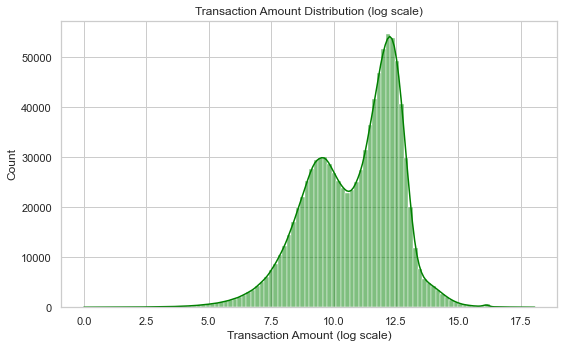

In [23]:
# Distribution plot (log scale for skewed amounts)
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["amount"]), bins=100,kde=True, color="green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Transaction Amount (log scale)")
plt.ylabel("Count")
#plt.legend(title="isFraud", labels=["Non-Fraud", "Fraud"])
plt.tight_layout()
plt.show()

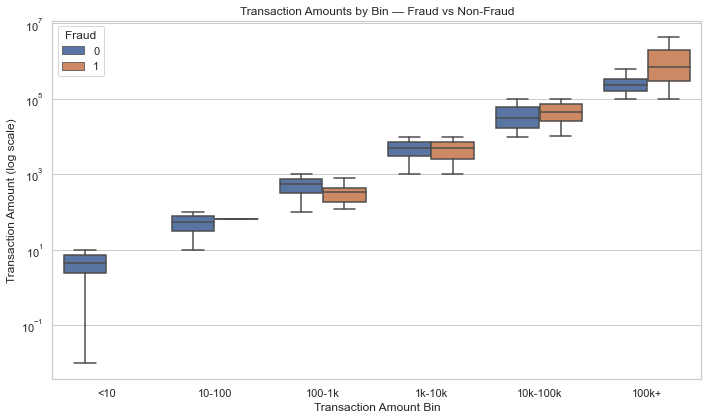

In [24]:
# Define bins again
bins = [0, 10, 100, 1000, 10000, 100000, df["amount"].max()]
labels = ["<10", "10-100", "100-1k", "1k-10k", "10k-100k", "100k+"]

df["amount_bin"] = pd.cut(df["amount"], bins=bins, labels=labels, include_lowest=True)

# Fraud rate per bin
fraud_by_amount = df.groupby("amount_bin")["isFraud"].mean().reset_index()

# ---- Boxplot of amounts per bin, split by fraud
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="amount_bin", y="amount", hue="isFraud", showfliers=False)
plt.yscale("log")
plt.title("Transaction Amounts by Bin — Fraud vs Non-Fraud")
plt.xlabel("Transaction Amount Bin")
plt.ylabel("Transaction Amount (log scale)")
plt.legend(title="Fraud")
plt.tight_layout()
plt.show()

Fraud Rate by Device Type:
   is_new_device  isFraud
0              0  0.00000
1              1  0.02532


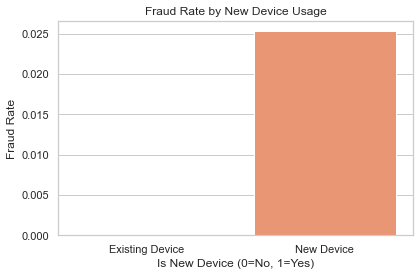

In [25]:
fraud_device = df.groupby("is_new_device")["isFraud"].mean().reset_index()

print("Fraud Rate by Device Type:")
print(fraud_device)

plt.figure(figsize=(6,4))
sns.barplot(data=fraud_device, x="is_new_device", y="isFraud", palette="Set2")
plt.title("Fraud Rate by New Device Usage")
plt.xlabel("Is New Device (0=No, 1=Yes)")
plt.ylabel("Fraud Rate")
plt.xticks([0,1], ["Existing Device", "New Device"])
plt.tight_layout()
plt.show()

In [26]:
df["time_since_last_transaction"].value_counts()

0.0      999772
4.0           4
144.0         3
192.0         3
26.0          3
          ...  
43.0          1
372.0         1
505.0         1
242.0         1
357.0         1
Name: time_since_last_transaction, Length: 165, dtype: int64

In [27]:
# Count transactions per customer
txn_counts = df["nameOrig"].value_counts()
df["is_repeat_customer"] = df["nameOrig"].isin(txn_counts[txn_counts > 1].index).astype(int)

fraud_repeat = df.groupby("is_repeat_customer")["isFraud"].sum().reset_index()

print("\nFraud Rate by Repeat Customers:")
print(fraud_repeat)


Fraud Rate by Repeat Customers:
   is_repeat_customer  isFraud
0                   0     1266
1                   1        0


In [28]:
# Transactions per customer (nameOrig = customer ID)
txn_per_customer = df.groupby("nameOrig").agg(
    total_txns=("isFraud", "count"),   # total transactions per customer
    fraud_txns=("isFraud", "sum")      # fraudulent transactions per customer
).reset_index()

# Add fraud rate per customer
txn_per_customer["fraud_rate"] = txn_per_customer["fraud_txns"] / txn_per_customer["total_txns"]

print(txn_per_customer.head())

      nameOrig  total_txns  fraud_txns  fraud_rate
0  C1000001337           1           0         0.0
1  C1000009135           1           0         0.0
2   C100001401           1           0         0.0
3  C1000015836           1           0         0.0
4  C1000018217           1           0         0.0


### How many customers are repeat vs single-use?

In [29]:
repeat_cust = txn_per_customer["total_txns"].value_counts().sort_index()
repeat_cust.head(10)

1    999538
2       231
Name: total_txns, dtype: int64

### How many customers ever commit fraud?

In [30]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

#print(f"Fraudulent customers: {fraud_customers}/{total_customers} "
     # f"({fraud_customers/total_customers:.4%})")

C1131453044    1
C728984460     1
C1444290021    1
C94208509      1
C1536280530    1
C122285117     1
C563591583     1
C1011516202    1
C1189870907    1
C1255221578    1
Name: nameOrig, dtype: int64

### Fraud rate by repeat vs single-use customers

In [31]:
txn_per_customer["is_repeat"] = (txn_per_customer["total_txns"] > 1).astype(int)

fraud_by_repeat = txn_per_customer.groupby("is_repeat")["fraud_rate"].mean()
print(fraud_by_repeat)


is_repeat
0    0.001267
1    0.000000
Name: fraud_rate, dtype: float64


In [32]:
df["diffbalanceOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["diffbalanceDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [33]:
(df["diffbalanceOrig"]< 0).sum()

219951

Number of transactions during unusual hours: 390934


Text(0, 0.5, 'Count')

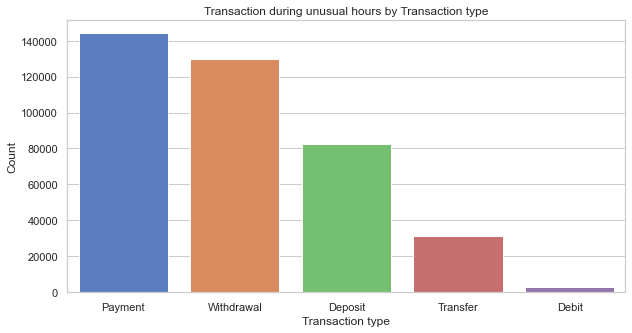

In [34]:
# Convert transaction_time to datetime
df["transaction_time"] = pd.to_datetime(df["transaction_time"], errors="coerce")
df["transaction_hour"] = df["transaction_time"].dt.hour

# Defining unusual hours (outside 8AM -6PM)
unusual_hours = list(range(0,8)) + list(range(18,24))

#filter transactions during unusual hours
unusual_hours_txn = df[df["transaction_hour"].isin(unusual_hours)]

print(f"Number of transactions during unusual hours: {len(unusual_hours_txn)}")

# Visualize transactions during unusual hours by type
plt.figure(figsize=(10,5))
sns.countplot(data=unusual_hours_txn, x="transaction_type",palette="muted")
plt.title("Transaction during unusual hours by Transaction type")
plt.xlabel("Transaction type")
plt.ylabel("Count")

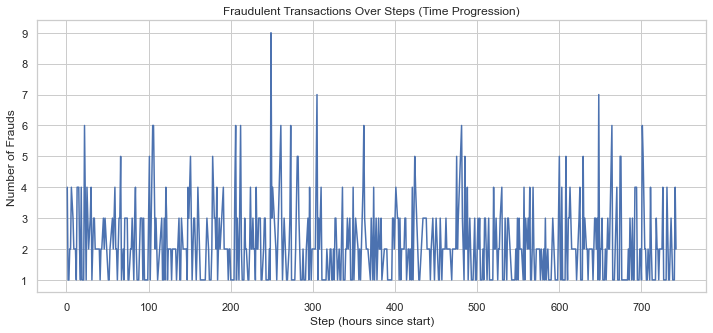

In [35]:
# Fraud count per step
fraud_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.plot(fraud_per_step.index, fraud_per_step.values, label= "Frauds per step")
plt.title("Fraudulent Transactions Over Steps (Time Progression)")
plt.xlabel("Step (hours since start)")
plt.ylabel("Number of Frauds")
plt.show()


In [36]:
top_senders = df["nameOrig"].value_counts().head(10)
top_senders

C54613684      2
C246698625     2
C1880754782    2
C199101361     2
C599116107     2
C34591457      2
C103372143     2
C273247153     2
C59633115      2
C1559986513    2
Name: nameOrig, dtype: int64

In [37]:
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers

C1234776885    24
C1899073220    20
C1379031360    19
C1360767589    19
C985934102     19
C842729010     18
C1262822392    18
C998351292     18
C1286084959    18
C932583850     18
Name: nameDest, dtype: int64

In [38]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [39]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.003474,-0.007766,0.298407,0.465353,0.068739
oldbalanceOrg,-0.003474,1.000000,0.998880,0.065026,0.040808,0.008685
newbalanceOrig,-0.007766,0.998880,1.000000,0.066539,0.040628,-0.008164
oldbalanceDest,0.298407,0.065026,0.066539,1.000000,0.976578,-0.006629
newbalanceDest,0.465353,0.040808,0.040628,0.976578,1.000000,-0.000664
isFraud,0.068739,0.008685,-0.008164,-0.006629,-0.000664,1.000000


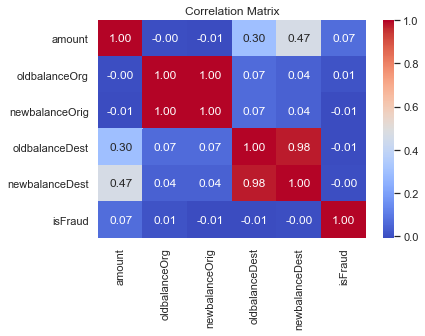

In [40]:
sns.heatmap(corr, annot=True, cmap ="coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [41]:
# Calculating empty account balance after transaction
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["transaction_type"].isin(["Transfer","Withdrawal"]))
 ]

In [42]:
len(zero_after_transfer)

186689

In [43]:
zero_after_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,time_since_last_transaction,is_new_device,amount_fraction_of_balance,is_new_destination,LoginAttempts,amount_bin,is_repeat_customer,diffbalanceOrig,diffbalanceDest,transaction_hour
3,163,CASH_OUT,77027.49,C1000015836,19787.00,0.0,C941241676,0.0,77027.49,0,...,0.0,0,1.0,1,1,10k-100k,0,19787.00,77027.49,19
14,655,TRANSFER,253648.68,C1000036340,253648.68,0.0,C1958275811,0.0,0.00,1,...,0.0,1,1.0,1,2,100k+,0,253648.68,0.00,7
15,211,CASH_OUT,278883.60,C1000036998,27674.00,0.0,C472295300,0.0,278883.60,0,...,0.0,1,1.0,1,1,100k+,0,27674.00,278883.60,19
21,393,CASH_OUT,61997.99,C1000048932,130.00,0.0,C655566527,0.0,61997.99,0,...,0.0,0,1.0,1,1,10k-100k,0,130.00,61997.99,9
22,155,CASH_OUT,245438.01,C1000050651,90092.00,0.0,C1878588507,0.0,245438.01,0,...,0.0,0,1.0,1,1,100k+,0,90092.00,245438.01,11


In [44]:
# Calculate change in balance for each transactions, considering transaction_type
df["BalanceChange"] = df.apply(
    lambda row:row["oldbalanceOrg"] - row["amount"] if row["transaction_type"] == ["Transfer", "Withdrawal","Debit"]
    else row["oldbalanceOrg"] + row["amount"],
    axis =1
)

# Detecting large balance change based on threshold ( e.g 2 standard deviation)
balance_change_threshold = df["BalanceChange"].mean() + 2*df["BalanceChange"].std()
large_balance_changes = df[df["BalanceChange"].abs() > balance_change_threshold]
print(f"Number of transactions with large balance changes: {len(large_balance_changes)}")

Number of transactions with large balance changes: 43108


In [45]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,is_new_device,amount_fraction_of_balance,is_new_destination,LoginAttempts,amount_bin,is_repeat_customer,diffbalanceOrig,diffbalanceDest,transaction_hour,BalanceChange
0,217,PAYMENT,3170.28,C1000001337,58089.00,54918.72,M216466820,0.00,0.00,0,...,1,0.054576,1,1,1k-10k,0,3170.28,0.00,1,61259.28
1,19,PAYMENT,3849.38,C1000009135,103120.55,99271.17,M2120765976,0.00,0.00,0,...,0,0.037329,1,1,1k-10k,0,3849.38,0.00,19,106969.93
2,302,PAYMENT,17686.93,C100001401,104117.89,86430.95,M70139133,0.00,0.00,0,...,0,0.169874,1,1,10k-100k,0,17686.94,0.00,14,121804.82
3,163,CASH_OUT,77027.49,C1000015836,19787.00,0.00,C941241676,0.00,77027.49,0,...,0,1.000000,1,1,10k-100k,0,19787.00,77027.49,19,96814.49
4,96,CASH_OUT,290045.17,C1000018217,0.00,0.00,C187378283,914750.06,1204795.23,0,...,0,0.000000,1,1,100k+,0,0.00,290045.17,0,290045.17


In [46]:
# Transactions with more than one login attempt
high_login_attempts = df[df["LoginAttempts"]> 1]
print(f"Number of transactions with more than one login attempts: {len(high_login_attempts)}")
display(high_login_attempts.head())

Number of transactions with more than one login attempts: 100640


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,is_new_device,amount_fraction_of_balance,is_new_destination,LoginAttempts,amount_bin,is_repeat_customer,diffbalanceOrig,diffbalanceDest,transaction_hour,BalanceChange
12,226,PAYMENT,35889.19,C1000028914,0.00,0.00,M1571108016,0.00,0.00,0,...,0,0.000000,1,2,10k-100k,0,0.00,0.00,10,35889.19
14,655,TRANSFER,253648.68,C1000036340,253648.68,0.00,C1958275811,0.00,0.00,1,...,1,1.000000,1,2,100k+,0,253648.68,0.00,7,507297.36
16,10,CASH_IN,451174.06,C1000037689,4042922.49,4494096.56,C925108082,1900737.34,1449563.28,0,...,0,0.111596,1,2,100k+,0,-451174.07,-451174.06,10,4494096.55
25,258,PAYMENT,1140.86,C100005294,0.00,0.00,M1606566150,0.00,0.00,0,...,0,0.000000,1,2,1k-10k,0,0.00,0.00,18,1140.86
27,594,PAYMENT,382.10,C100006029,0.00,0.00,M1030368393,0.00,0.00,0,...,0,0.000000,1,3,100-1k,0,0.00,0.00,18,382.10


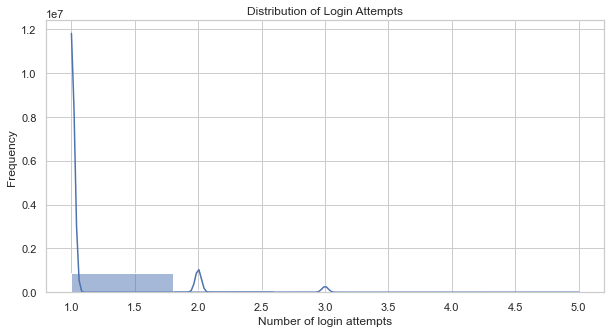

In [47]:
#Distribution of Login Attempts
plt.figure(figsize=(10,5))
sns.histplot(df["LoginAttempts"], bins =5, kde=True)
plt.title("Distribution of Login Attempts")
plt.xlabel("Number of login attempts")
plt.ylabel("Frequency")
plt.show()

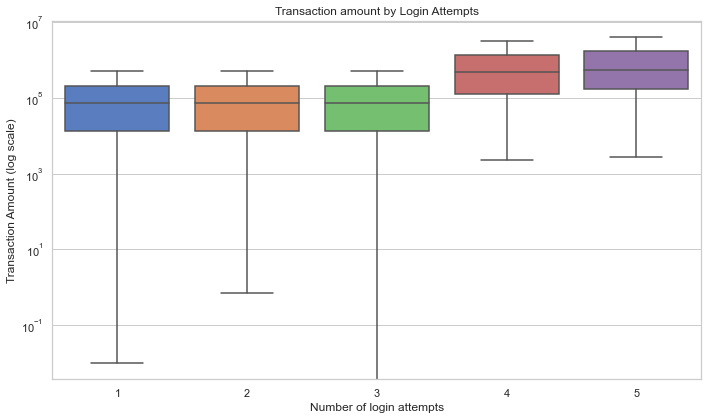

In [48]:
# LoginAttempts vs. Amount
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="LoginAttempts", y="amount", palette="muted", showfliers=False)
plt.yscale("log")
plt.title("Transaction amount by Login Attempts")
plt.xlabel("Number of login attempts")
plt.ylabel("Transaction Amount (log scale)")
plt.tight_layout()
plt.show()

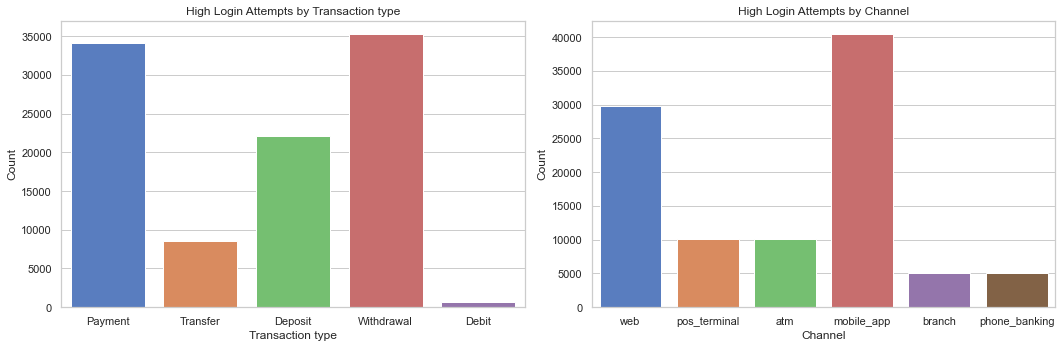

In [49]:
plt.figure(figsize=(15,5))

# High login attempts by Transaction type
plt.subplot(1,2,1)
sns.countplot(data=high_login_attempts, x="transaction_type",palette="muted")
plt.title("High Login Attempts by Transaction type")
plt.xlabel("Transaction type")
plt.ylabel("Count")

# High login attempts by Transaction type
plt.subplot(1,2,2)
sns.countplot(data=high_login_attempts, x="channel",palette="muted")
plt.title("High Login Attempts by Channel")
plt.xlabel("Channel")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [50]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'transaction_type', 'channel', 'transaction_time',
       'time_since_last_transaction', 'is_new_device',
       'amount_fraction_of_balance', 'is_new_destination', 'LoginAttempts',
       'amount_bin', 'is_repeat_customer', 'diffbalanceOrig',
       'diffbalanceDest', 'transaction_hour', 'BalanceChange'],
      dtype='object')

In [51]:
# Identifying features to exclude based on their potential redundancy and low importance
exclude = ["step","type","nameOrig","nameDest", "isFlaggedFraud","time_since_last_transaction", "amount_fraction_of_balance",
          "amount_bin","diffbalanceOrig","diffbalanceDest","BalanceChange","transaction_time","transaction_hour", "is_repeat_customer"]

In [52]:
df_model = df.drop(exclude, axis=1)

In [53]:
df_model.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,channel,is_new_device,is_new_destination,LoginAttempts
0,3170.28,58089.00,54918.72,0.00,0.00,0,Payment,web,1,1,1
1,3849.38,103120.55,99271.17,0.00,0.00,0,Payment,web,0,1,1
2,17686.93,104117.89,86430.95,0.00,0.00,0,Payment,web,0,1,1
3,77027.49,19787.00,0.00,0.00,77027.49,0,Withdrawal,mobile_app,0,1,1
4,290045.17,0.00,0.00,914750.06,1204795.23,0,Withdrawal,mobile_app,0,1,1


### Class Distribution before SMOTE

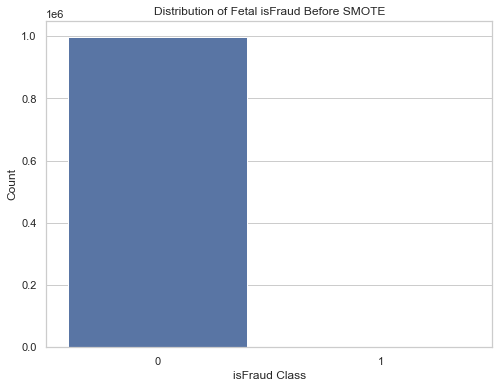

In [54]:
# Visualizing the distribution of the target variable 'isFraud' before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df)
plt.title("Distribution of isFraud Before SMOTE")
plt.xlabel("isFraud Class")
plt.ylabel("Count")
plt.show()

### Applying SMOTE-like resampling using sklearn's resample method

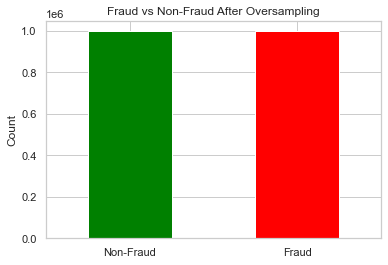

In [58]:
from sklearn.utils import resample

X = df_model.drop("isFraud", axis=1)   # Features
y = df_model["isFraud"]                # Target

def balance_classes(X, y):
    # Combine features + target
    df_train = pd.concat([X, y], axis=1)

    # Split majority and minority
    df_majority = df_train[df_train.isFraud == 0]
    df_minority = df_train[df_train.isFraud == 1]

    # Upsample minority
    df_minority_upsampled = resample(
        df_minority,
        replace=True,                 # sample with replacement
        n_samples=len(df_majority),   # match majority size
        random_state=42
    )

    # Combine back
    df_balanced = pd.concat([df_majority, df_minority_upsampled])

    # Shuffle
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    # Split again
    X_bal = df_balanced.drop("isFraud", axis=1)
    y_bal = df_balanced["isFraud"]

    return X_bal, y_bal

# Apply balancing
X_resampled, y_resampled = balance_classes(X, y)

# Visualize distribution
plt.figure(figsize=(6,4))
y_resampled.value_counts().plot(kind="bar", color=["green","red"])
plt.title("Fraud vs Non-Fraud After Oversampling")
plt.xticks([0,1], ["Non-Fraud","Fraud"], rotation=0)
plt.ylabel("Count")
plt.show()

## Model Building & Prediction

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [63]:
# 1. Split classes
df_majority = df_model[df_model.isFraud == 0]
df_minority = df_model[df_model.isFraud == 1]

# 2. Upsample frauds
df_minority_upsampled = resample(
    df_minority,
    replace=True,                # sample with replacement
    n_samples=len(df_majority),  # match majority size
    random_state=42
)

# 3. Combine back
df_balanced = pd.concat([df_majority, df_minority_upsampled]).sample(frac=1, random_state=42)


In [64]:
# 4. Split features & target
X = df_balanced.drop("isFraud", axis=1)
y = df_balanced["isFraud"]

In [65]:
# Convert categorical variables into dummy/indicator variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [72]:
df_balanced.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'transaction_type', 'channel',
       'is_new_device', 'is_new_destination', 'LoginAttempts'],
      dtype='object')

In [79]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Train Logistic Regression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78    299621
           1       0.74      0.97      0.84    299620

    accuracy                           0.82    599241
   macro avg       0.85      0.82      0.81    599241
weighted avg       0.85      0.82      0.81    599241

Confusion Matrix:
[[198242 101379]
 [  7572 292048]]


In [ ]:
# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [80]:
S

0.8527638213612924
0.8181852652650996
